Consider the evolution of a simple Hamiltonian into a problem-specific Hamiltonian where the optimal solution is 'encoded' in the ground state of the problem Hamiltonian $\displaystyle H_{\text{P}}$

$$H\left(s\right) = \left(1 - s\right)H_0 + sH_{\text{P}},\quad\text{where }H_{\text{P}} = \underbrace{A\left[\sum_{j = 0}^{\ell}2^jy_j + \left(c + 1 - 2^{\ell + 1}\right)y_{\ell + 1} - \sum_{i = 1}^nw_ix_i\right]^2}_{H_A} + \underbrace{\left(-B\sum_{i = 1}^np_ix_i\right)}_{H_B}$$

for $\displaystyle s = \frac{t}{T}$ where $T$ is the total computation time and $\displaystyle \ell = \lfloor\log_2c\rfloor$


In [13]:
from qutip import tensor, basis, sigmaz, sigmaz, qeye, mesolve
import numpy as np

def tensor_sigmaz(i, n):
    ops = [qeye(2) for _ in range(n)]
    ops[i] = sigmaz()
    return tensor(ops)

# Parameters
num_items = 2
profits = np.array([5, 6])
weights = np.array([2, 3])
capacity = 2
A = np.max(profits) + 1
B = 1.0
ell = int(np.floor(np.log2(capacity - 1)))

total_qubits = num_items + ell + 1

# Initial Hamiltonian H_0
H_0 = sum(tensor_sigmaz(i, total_qubits) for i in range(total_qubits))

# Problem Hamiltonian H_P
H_A = A * (
    (sum(2**j * tensor_sigmaz(num_items + j, total_qubits) for j in range(ell + 1)) +
    (capacity + 1 - 2**(ell + 1)) * tensor_sigmaz(num_items + ell, total_qubits) -
    sum(weights[i] * tensor_sigmaz(i, total_qubits) for i in range(num_items)))
** 2)

H_B = -B * sum(profits[i] * tensor_sigmaz(i, total_qubits) for i in range(num_items))

H_P = H_A + H_B

T = 100
times = np.linspace(0, T, 10000)

# Time-dependent Hamiltonian function
def H(t, args):
    s = t / T
    return (1 - s) * H_0 + s * H_P

# Initial state: equal superposition of all states
psi0 = tensor([basis(2, 1) for _ in range(total_qubits)]).unit()

result = mesolve(H, psi0, times, [], [])

psi_final = result.states[-1]

print("Final state probabilities:")
print([abs(psi) ** 2 for psi in psi_final.full().flatten()])


Final state probabilities:
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.9999999999999998)]


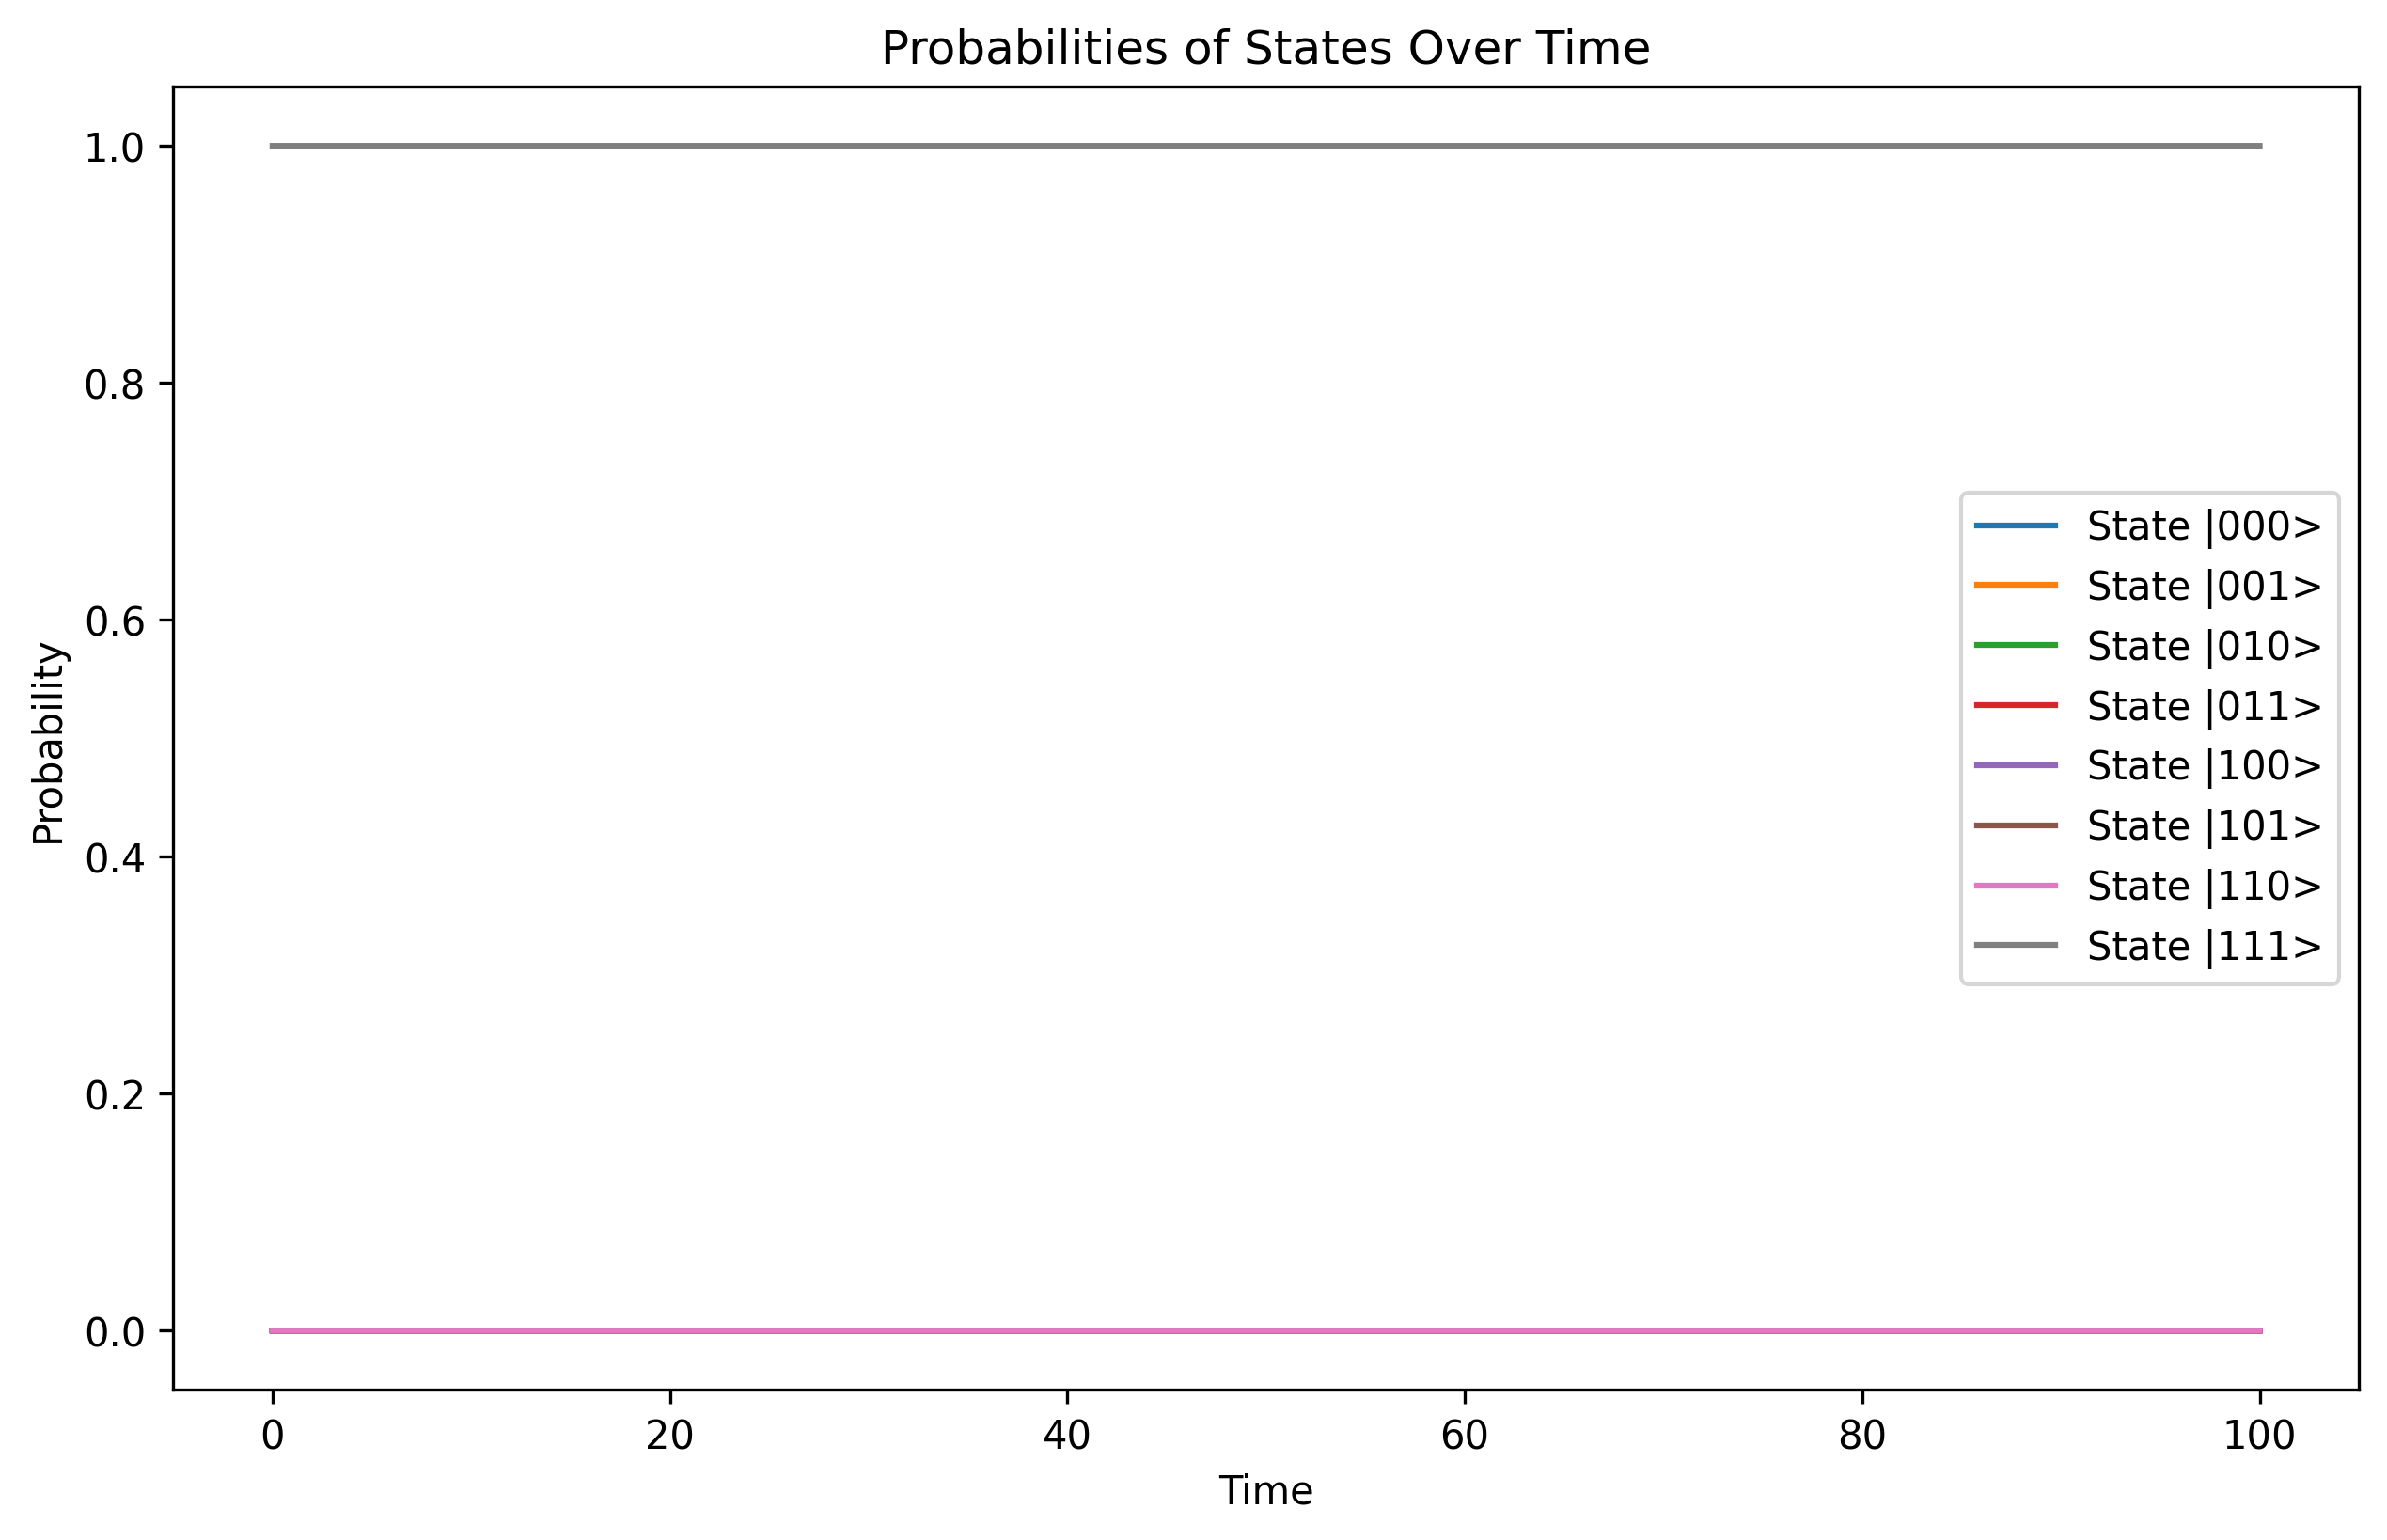

In [14]:
import matplotlib.pyplot as plt

all_probabilities = [np.abs(state.full())**2 for state in result.states]

plt.figure(figsize=(10, 6), dpi=300)
for idx in range(2**total_qubits):
    plt.plot(times, [prob[idx] for prob in all_probabilities], label=f'State |{format(idx, "0" + str(total_qubits) + "b")}>')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probabilities of States Over Time')
plt.legend()
plt.show()


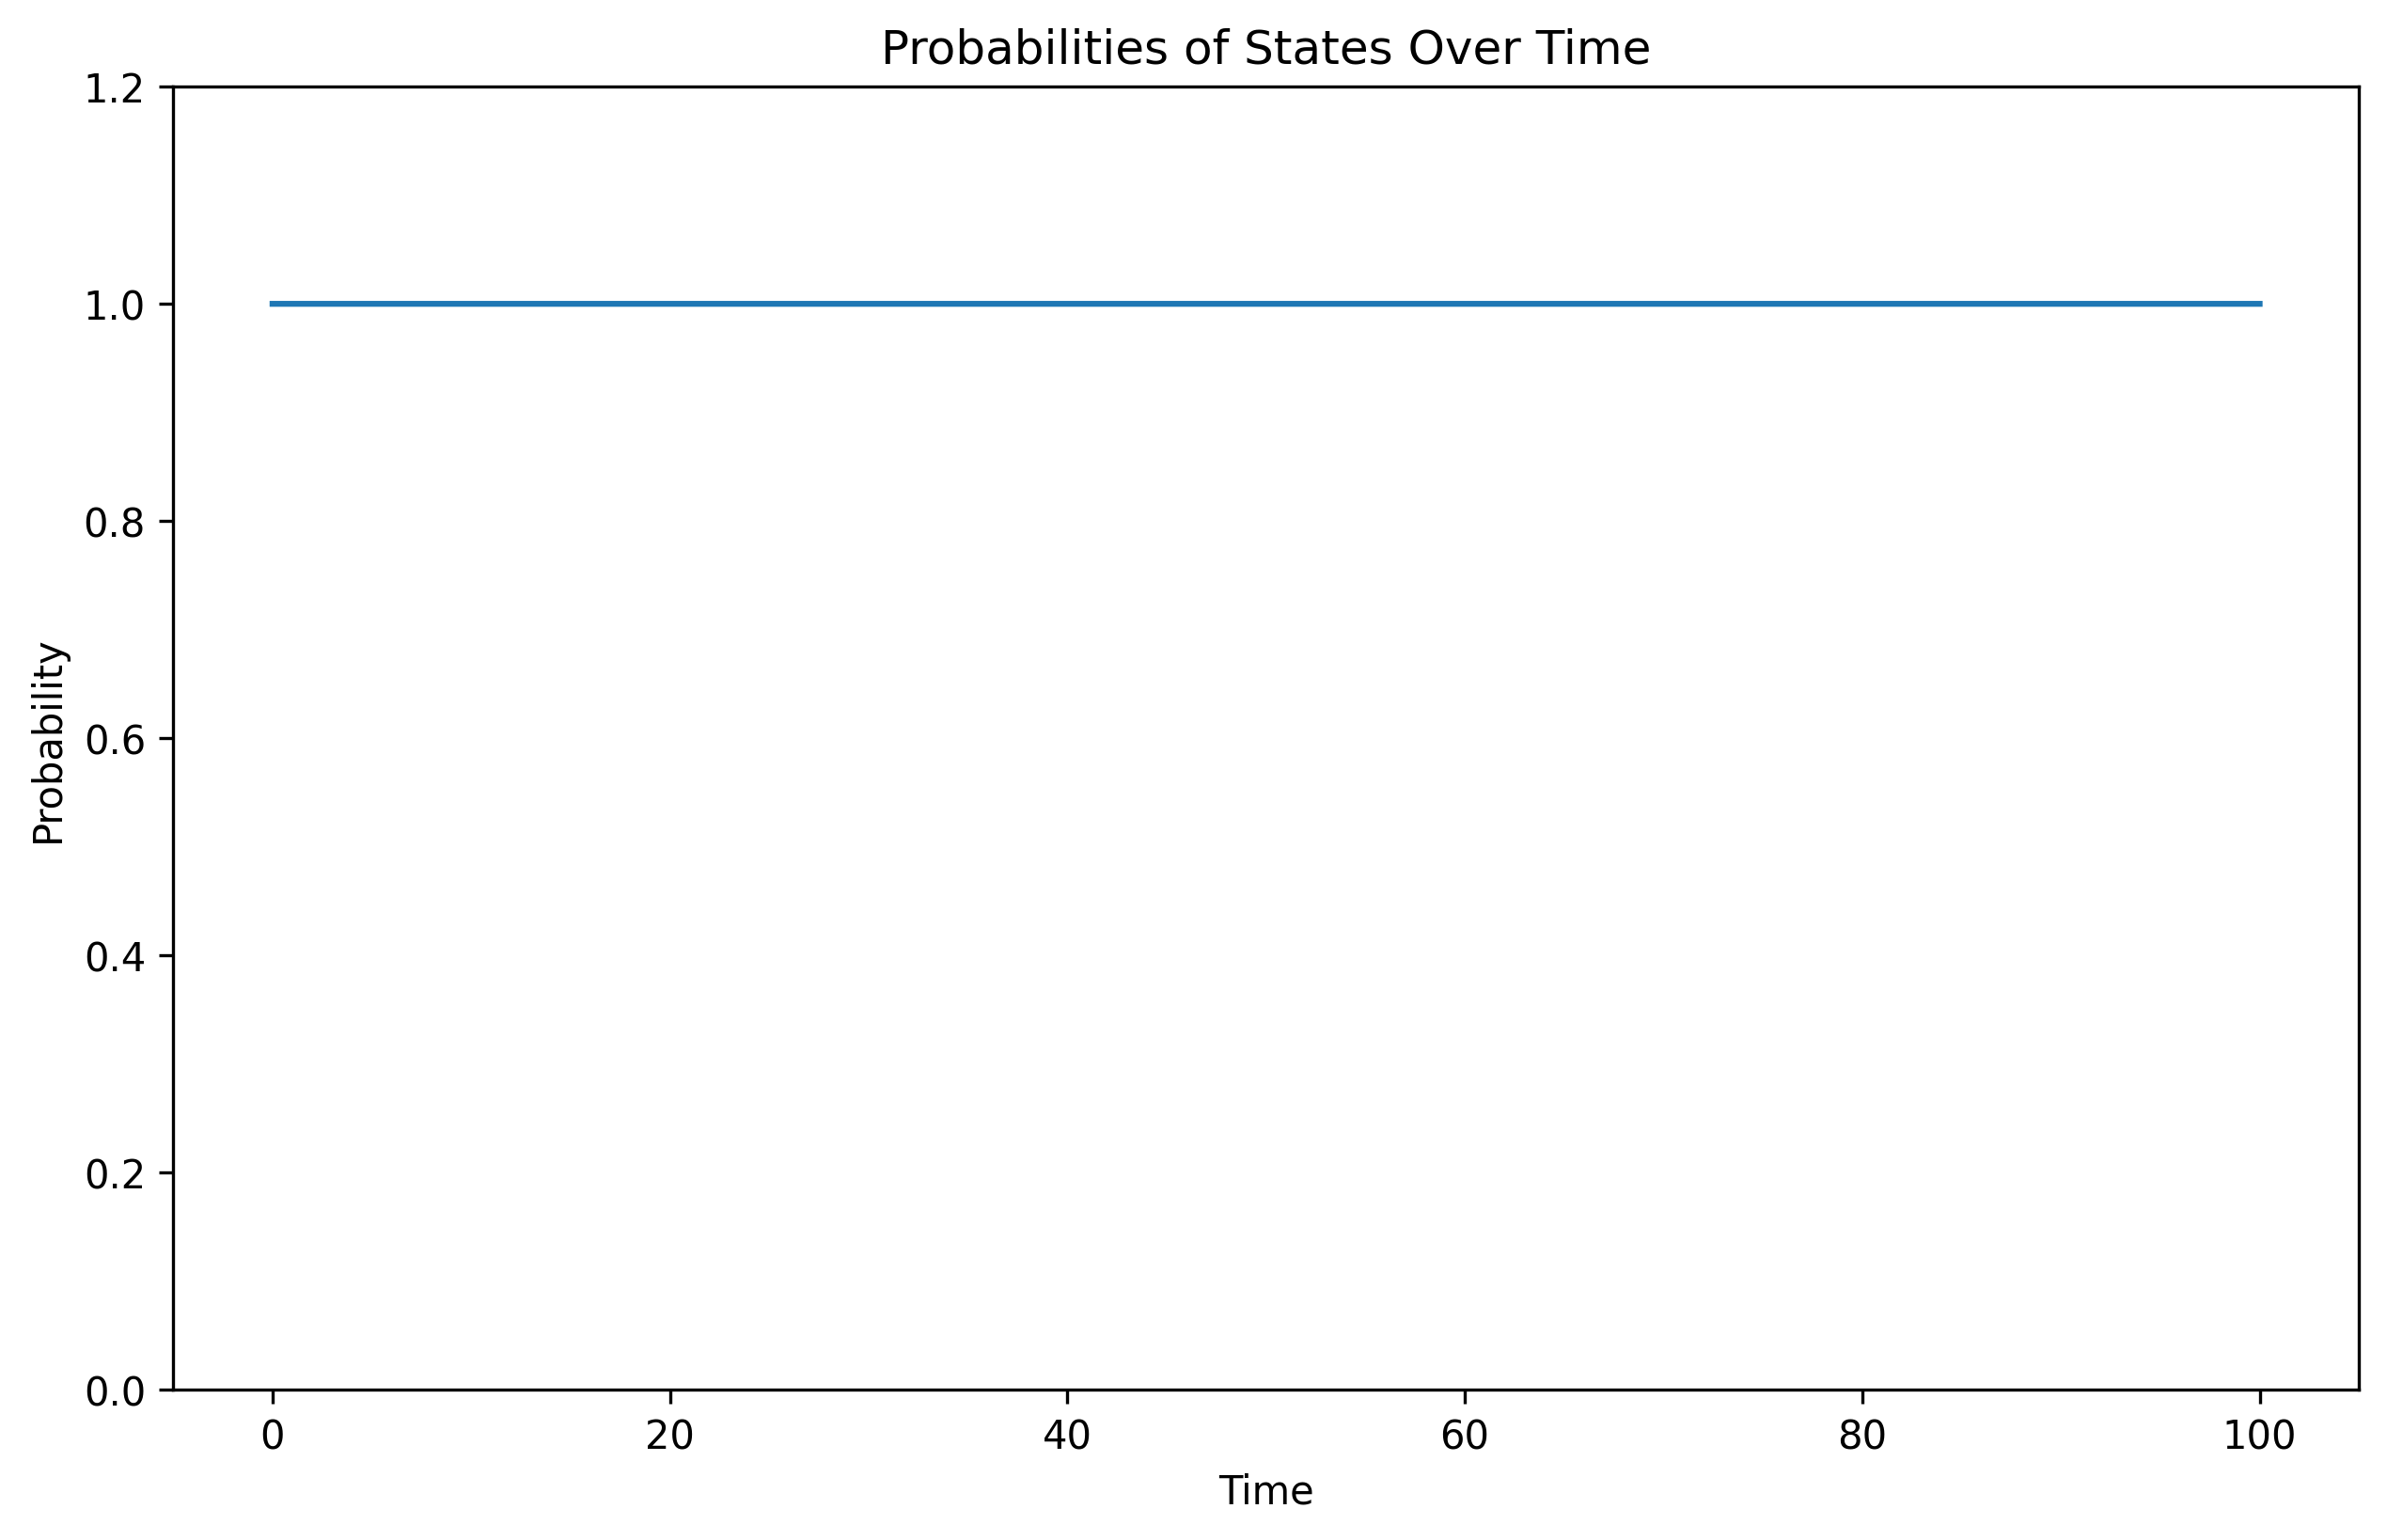

In [15]:
import matplotlib.pyplot as plt

all_probabilities = [np.abs(state.full())**2 for state in result.states]

probs = [np.sum(states) for states in all_probabilities]

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(times, probs)
plt.xlabel('Time')
plt.ylabel('Probability')
plt.ylim(0,1.2)
plt.title('Probabilities of States Over Time')
# plt.legend()
plt.show()


Most probable state: 111
Probability of this state: 1.0
Item inclusion (1 = included, 0 = not included): [1, 1]
Total weight of most probable configuration: 5
Total profit of most probable configuration: 11


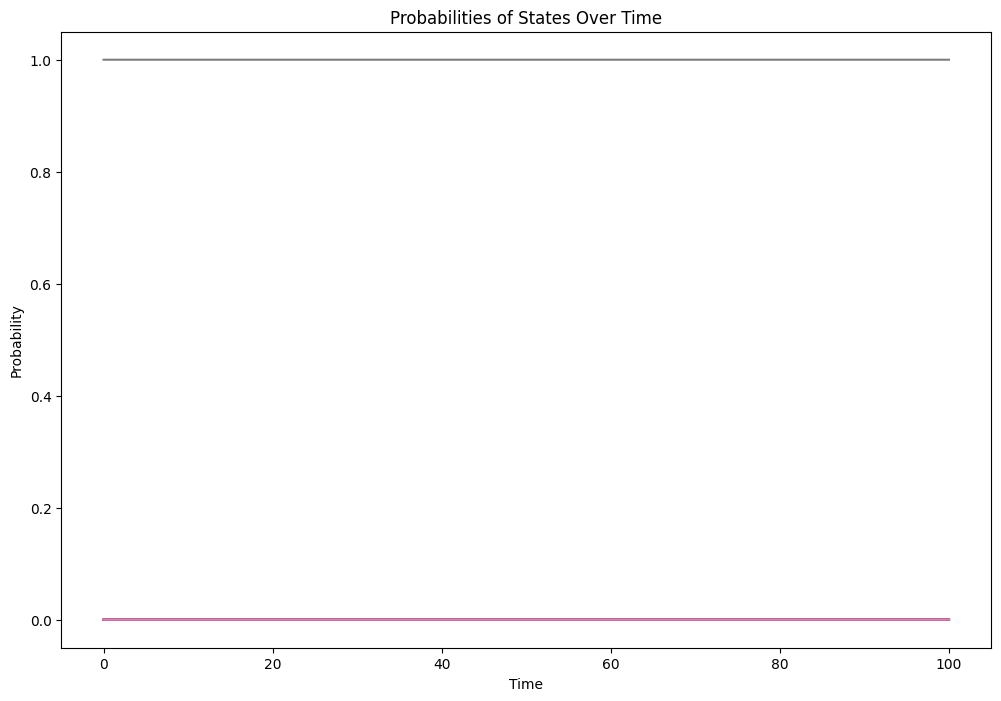

In [16]:
final_probabilities = np.abs(psi_final.full().flatten())**2

max_prob_index = np.argmax(final_probabilities)

most_probable_state = format(max_prob_index, '0' + str(total_qubits) + 'b')

print(f"Most probable state: {most_probable_state}")
print(f"Probability of this state: {final_probabilities[max_prob_index]}")

item_inclusion = [int(bit) for bit in most_probable_state[:num_items]]
print("Item inclusion (1 = included, 0 = not included):", item_inclusion)

total_weight = sum(weights[i] * item_inclusion[i] for i in range(num_items))
total_profit = sum(profits[i] * item_inclusion[i] for i in range(num_items))

print(f"Total weight of most probable configuration: {total_weight}")
print(f"Total profit of most probable configuration: {total_profit}")

plt.figure(figsize=(12, 8))
for idx in range(2**total_qubits):
    state_prob = [prob[idx] for prob in all_probabilities]
    plt.plot(times, state_prob, label=f'State |{format(idx, "0" + str(total_qubits) + "b")}>')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probabilities of States Over Time')
plt.show()
